# Examples of workflow plots

In [54]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

### Range to plot, has to be exactly 10

In [55]:
start = 30
stop = 40
output_dir = '../filtered_workloads_1s'

In [56]:
plot_data = []

for idx in range(start, stop):
    file_path = os.path.join(output_dir, f'{idx}.csv')
    df = pd.read_csv(file_path)
    plot_data.append(df)

In [41]:
plot_data[4]

,timestamp,power_draw_W,memory_free_MiB,memory_used_MiB,utilization_memory_pct,utilization_gpu_pct,id_user,cpus_req,mem_req,gres_used,nodes_alloc,timelimit,time_submit,time_start,time_end,time_eligible
0,0,43.393833,32510.00,0.00,0.000000,0.000000,5.810742e+12,8.0,256000.0,NaN,1.0,1440.0,1.627764e+09,1.627764e+09,1.627766e+09,1.627764e+09
1,1,43.406044,32510.00,0.00,0.000000,0.000000,5.810742e+12,8.0,256000.0,NaN,1.0,1440.0,1.627764e+09,1.627764e+09,1.627766e+09,1.627764e+09
2,2,43.396711,32510.00,0.00,0.000000,0.000000,5.810742e+12,8.0,256000.0,NaN,1.0,1440.0,1.627764e+09,1.627764e+09,1.627766e+09,1.627764e+09
3,3,43.413733,32510.00,0.00,0.000000,0.000000,5.810742e+12,8.0,256000.0,NaN,1.0,1440.0,1.627764e+09,1.627764e+09,1.627766e+09,1.627764e+09
4,4,43.418489,32510.00,0.00,0.000000,0.000000,5.810742e+12,8.0,256000.0,NaN,1.0,1440.0,1.627764e+09,1.627764e+09,1.627766e+09,1.627764e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,159,54.093644,9297.00,23213.00,11.196667,99.955556,5.810742e+12,8.0,256000.0,NaN,1.0,1440.0,1.627764e+09,1.627764e+09,1.627766e+09,1.627764e+09
160,160,52.451467,9297.00,23213.00,11.290000,99.970000,5.810742e+12,8.0,256000.0,NaN,1.0,1440.0,1.627764e+09,1.627764e+09,1.627766e+09,1.627764e+09
161,161,55.659611,9297.00,23213.00,11.305556,99.968889,5.810742e+12,8.0,256000.0,NaN,1.0,1440.0,1.627764e+09,1.627764e+09,1.627766e+09,1.627764e+09
162,162,52.109389,9297.00,23213.00,11.475556,99.960000,5.810742e+12,8.0,256000.0,NaN,1.0,1440.0,1.627764e+09,1.627764e+09,1.627766e+09,1.627764e+09


## Power usage

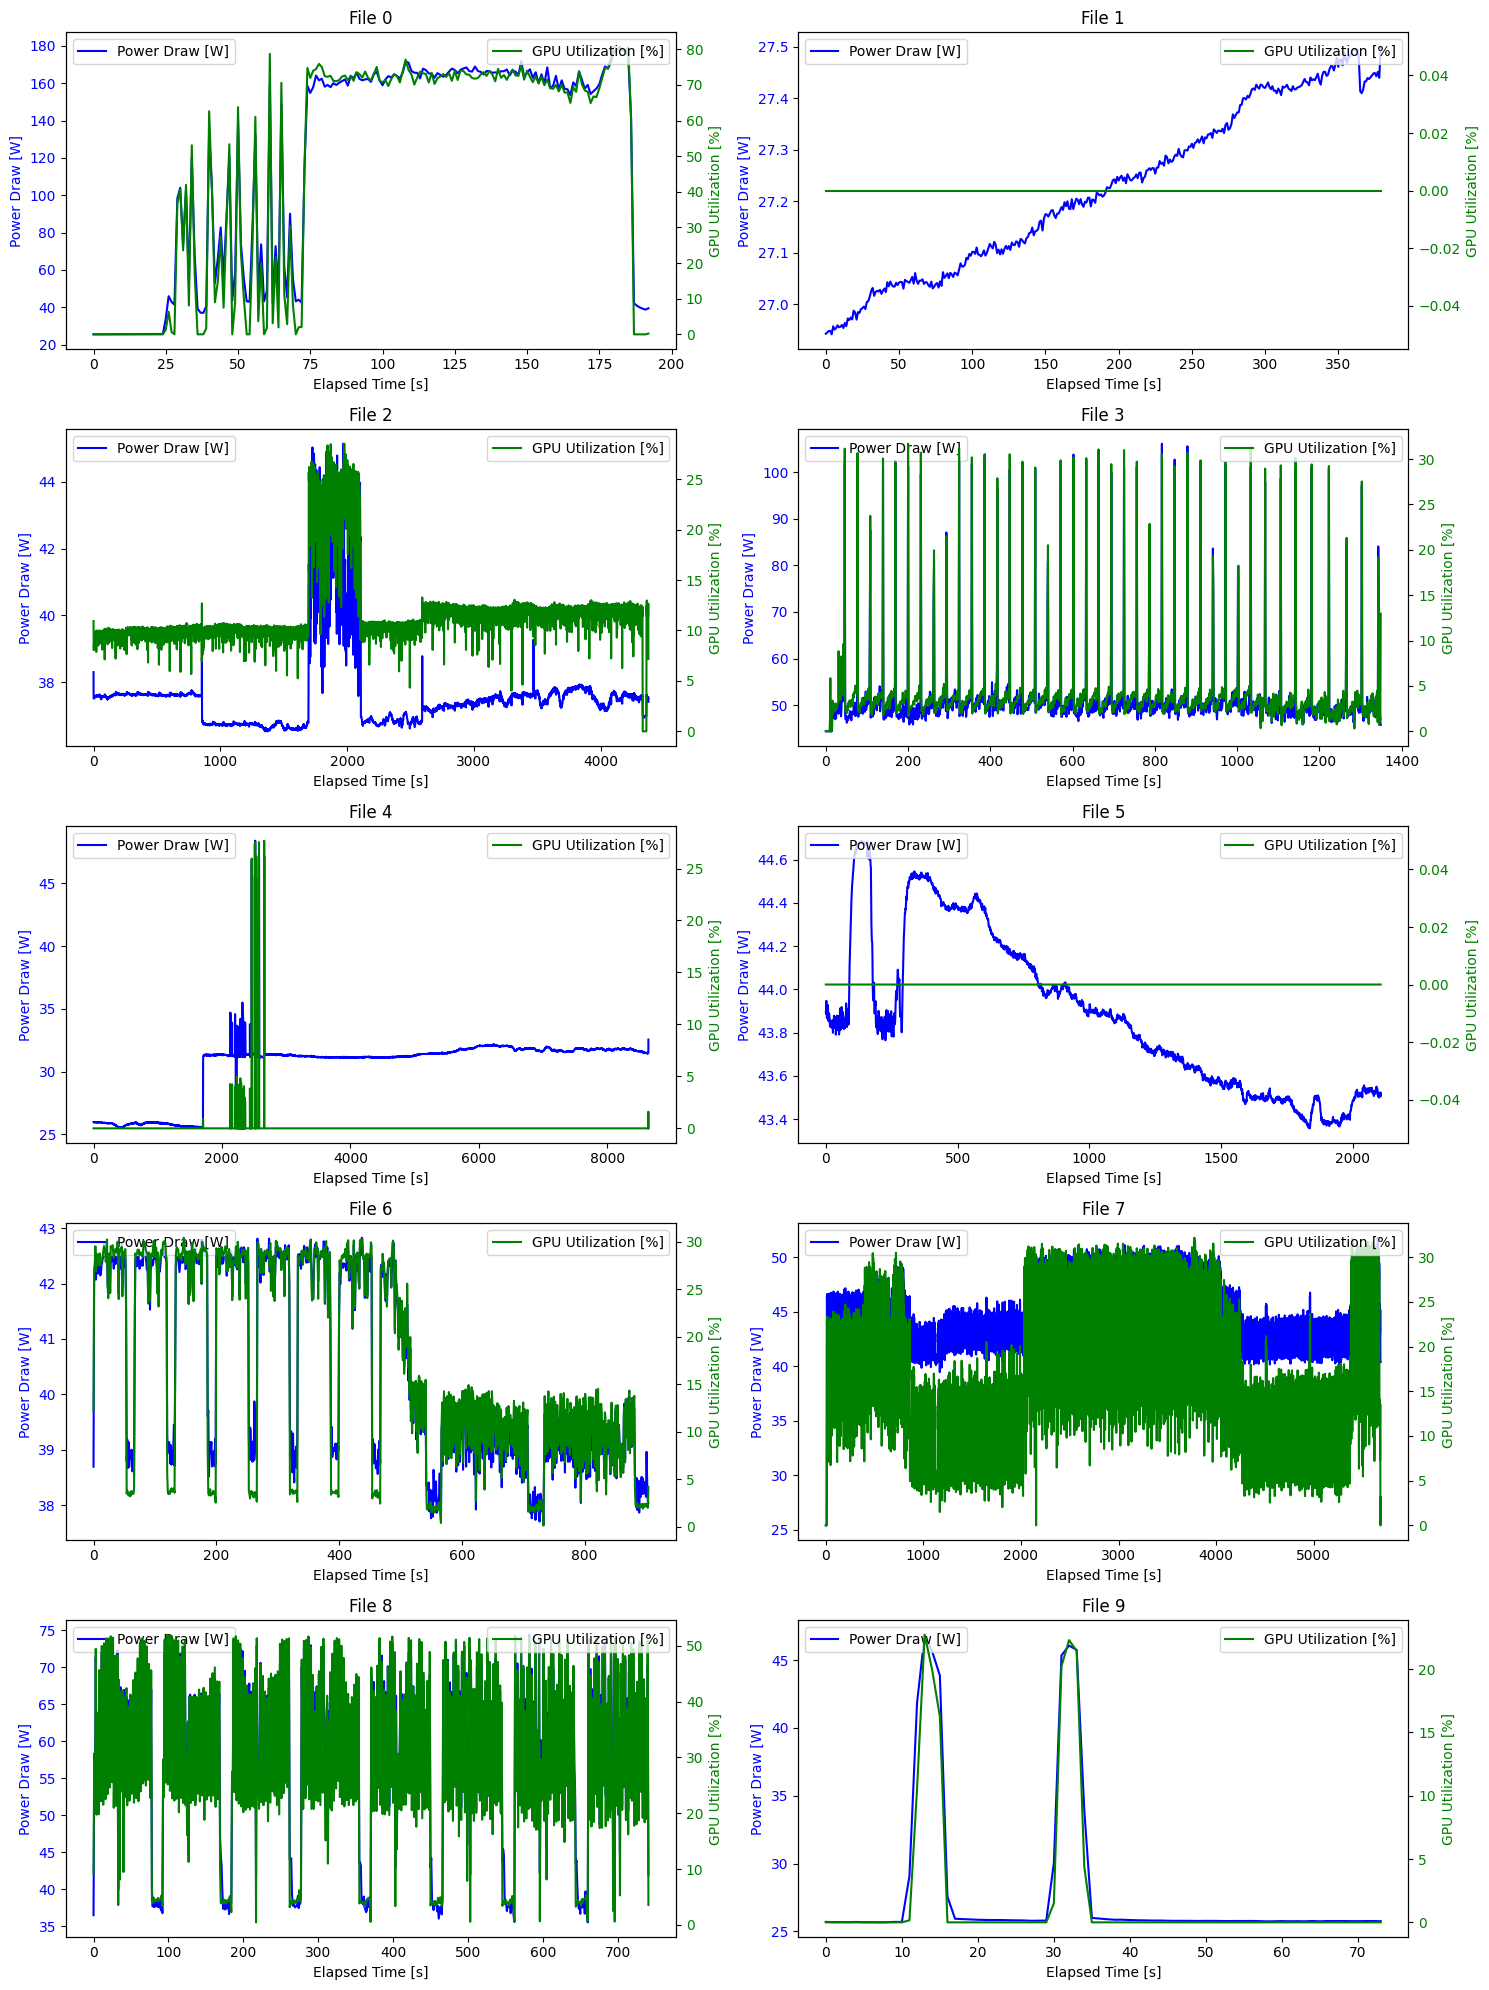

In [57]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
axes = axes.flatten()

for idx, (ax, df) in enumerate(zip(axes, plot_data)):
    # Plot power drawn on the primary y-axis
    ax.plot(df['timestamp'], df['power_draw_W'], color='blue', label='Power Draw [W]')
    ax.set_ylabel('Power Draw [W]', color='blue')
    ax.tick_params(axis='y', labelcolor='blue')
    
    # Create a twin y-axis for utilization percentage
    ax2 = ax.twinx()
    ax2.plot(df['timestamp'], df['utilization_gpu_pct'], color='green', label='GPU Utilization [%]')
    ax2.set_ylabel('GPU Utilization [%]', color='green')
    ax2.tick_params(axis='y', labelcolor='green')

    # Add a title and x-axis label
    ax.set_title(f'File {idx}')
    ax.set_xlabel('Elapsed Time [s]')
    
    # Add legends
    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


## Memory 

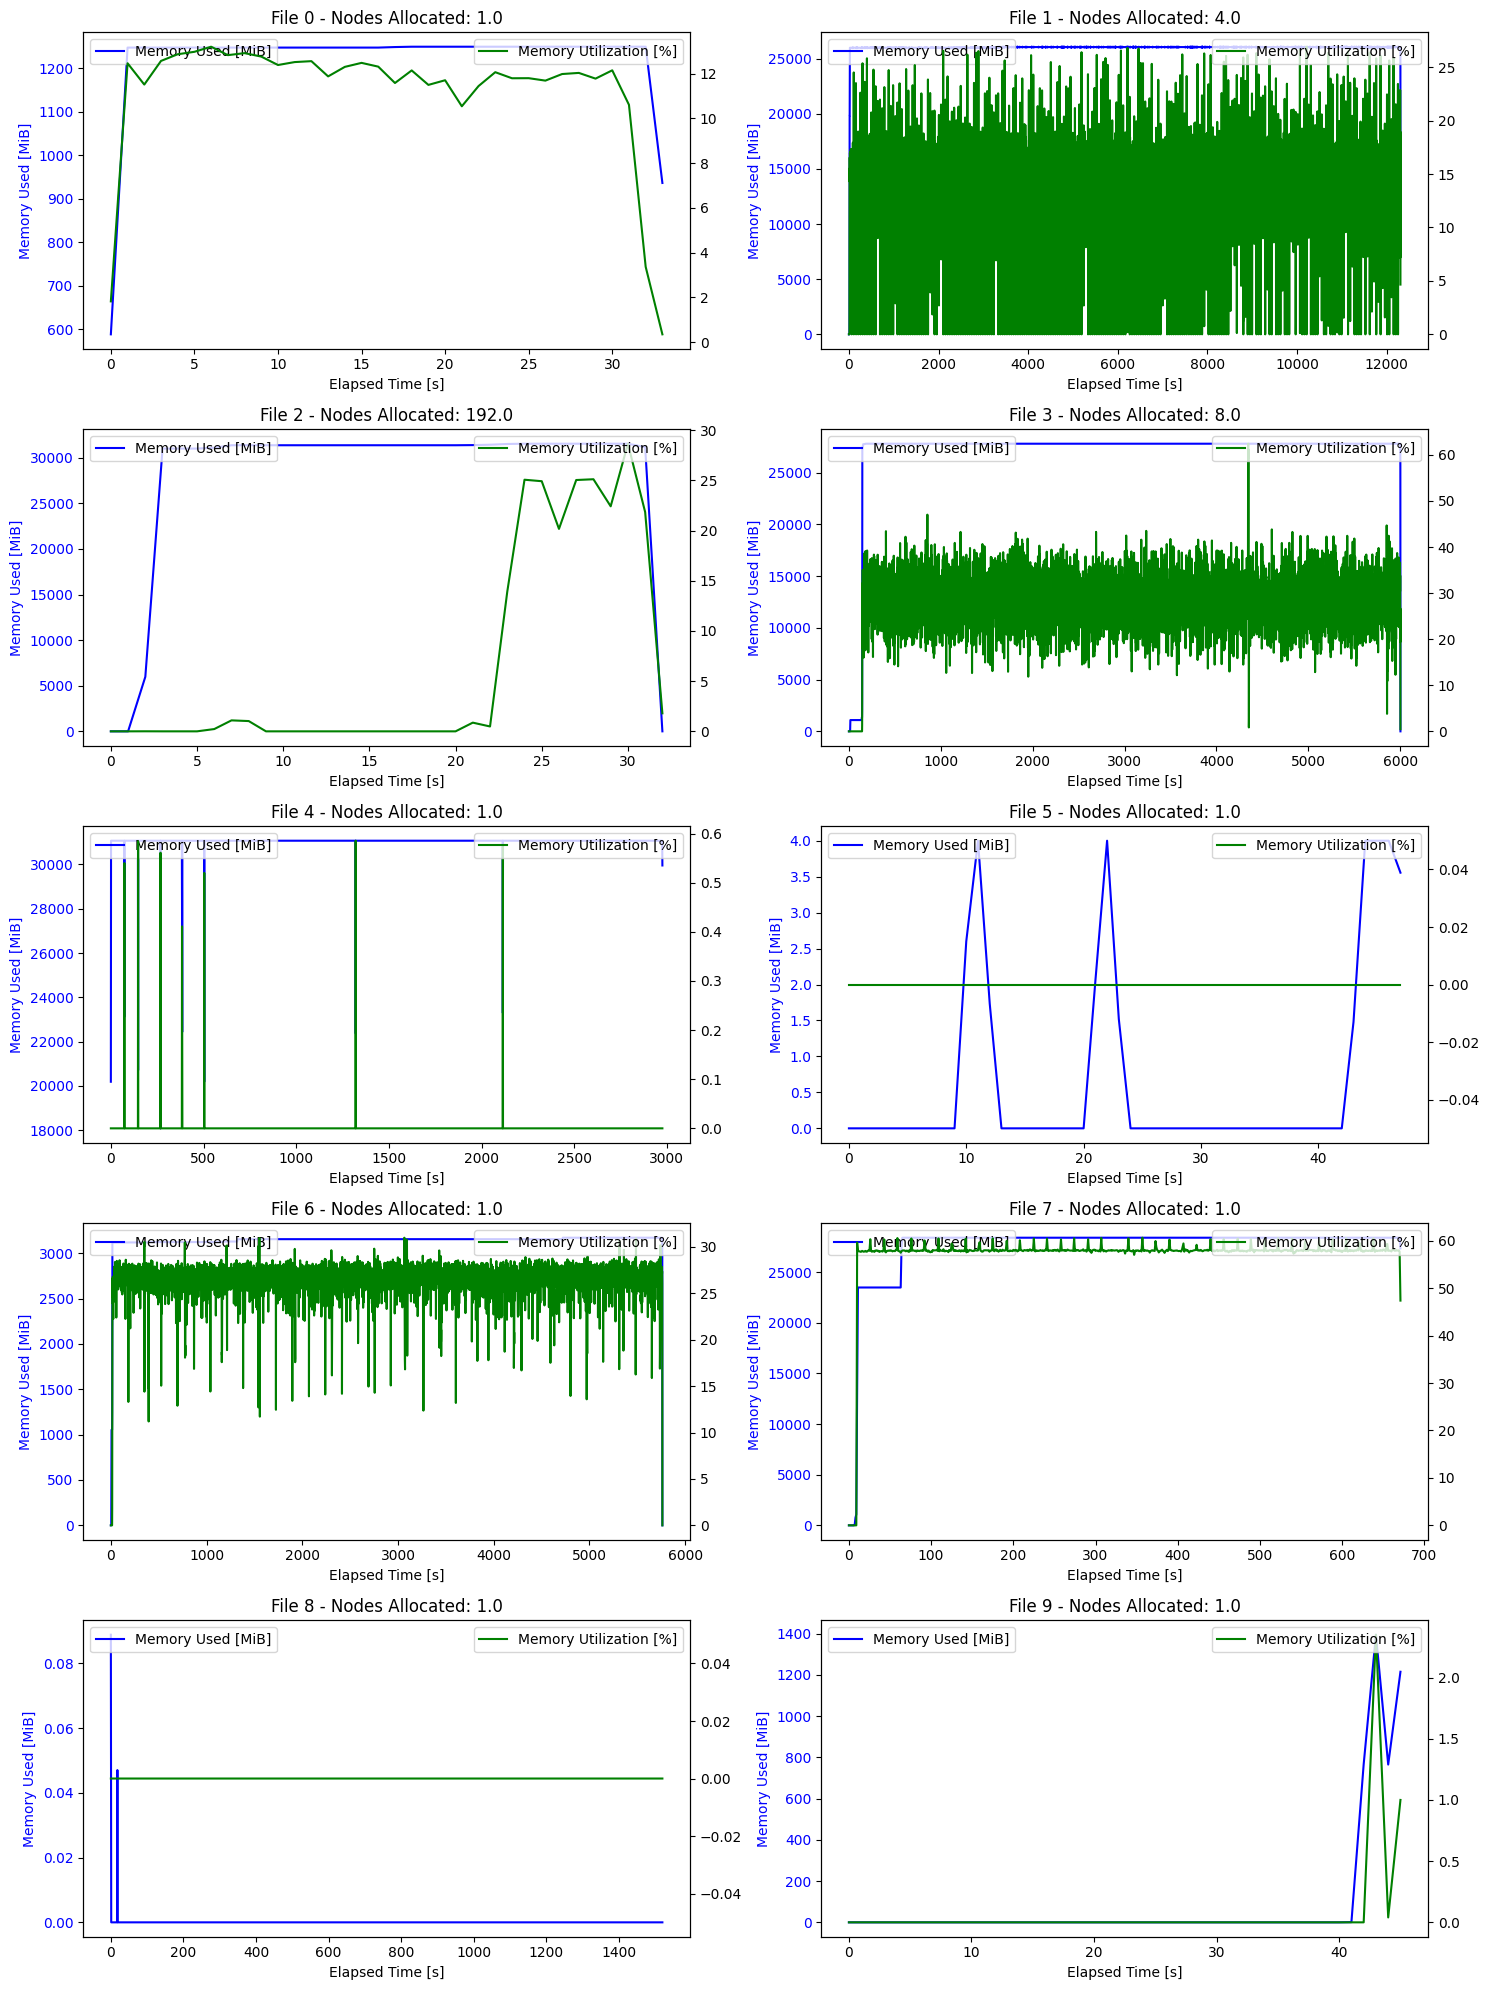

In [38]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
axes = axes.flatten()

for idx, (ax, df) in enumerate(zip(axes, plot_data)):
    # Plot memory used on the primary y-axis
    ax.plot(df['timestamp'], df['memory_used_MiB'], color='blue', label='Memory Used [MiB]')
    ax.set_ylabel('Memory Used [MiB]', color='blue')
    ax.tick_params(axis='y', labelcolor='blue')
    
    # Create a twin y-axis for utilization and nodes allocated
    ax2 = ax.twinx()
    
    # Plot utilization memory percentage
    ax2.plot(df['timestamp'], df['utilization_memory_pct'], color='green', label='Memory Utilization [%]')
    
    # Add title and include nodes_alloc
    nodes_alloc = df['nodes_alloc'].max()  # You can use max, mean, or other stats
    ax.set_title(f'File {idx} - Nodes Allocated: {nodes_alloc}')
    ax.set_xlabel('Elapsed Time [s]')
    
    # Add legends for both y-axes
    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


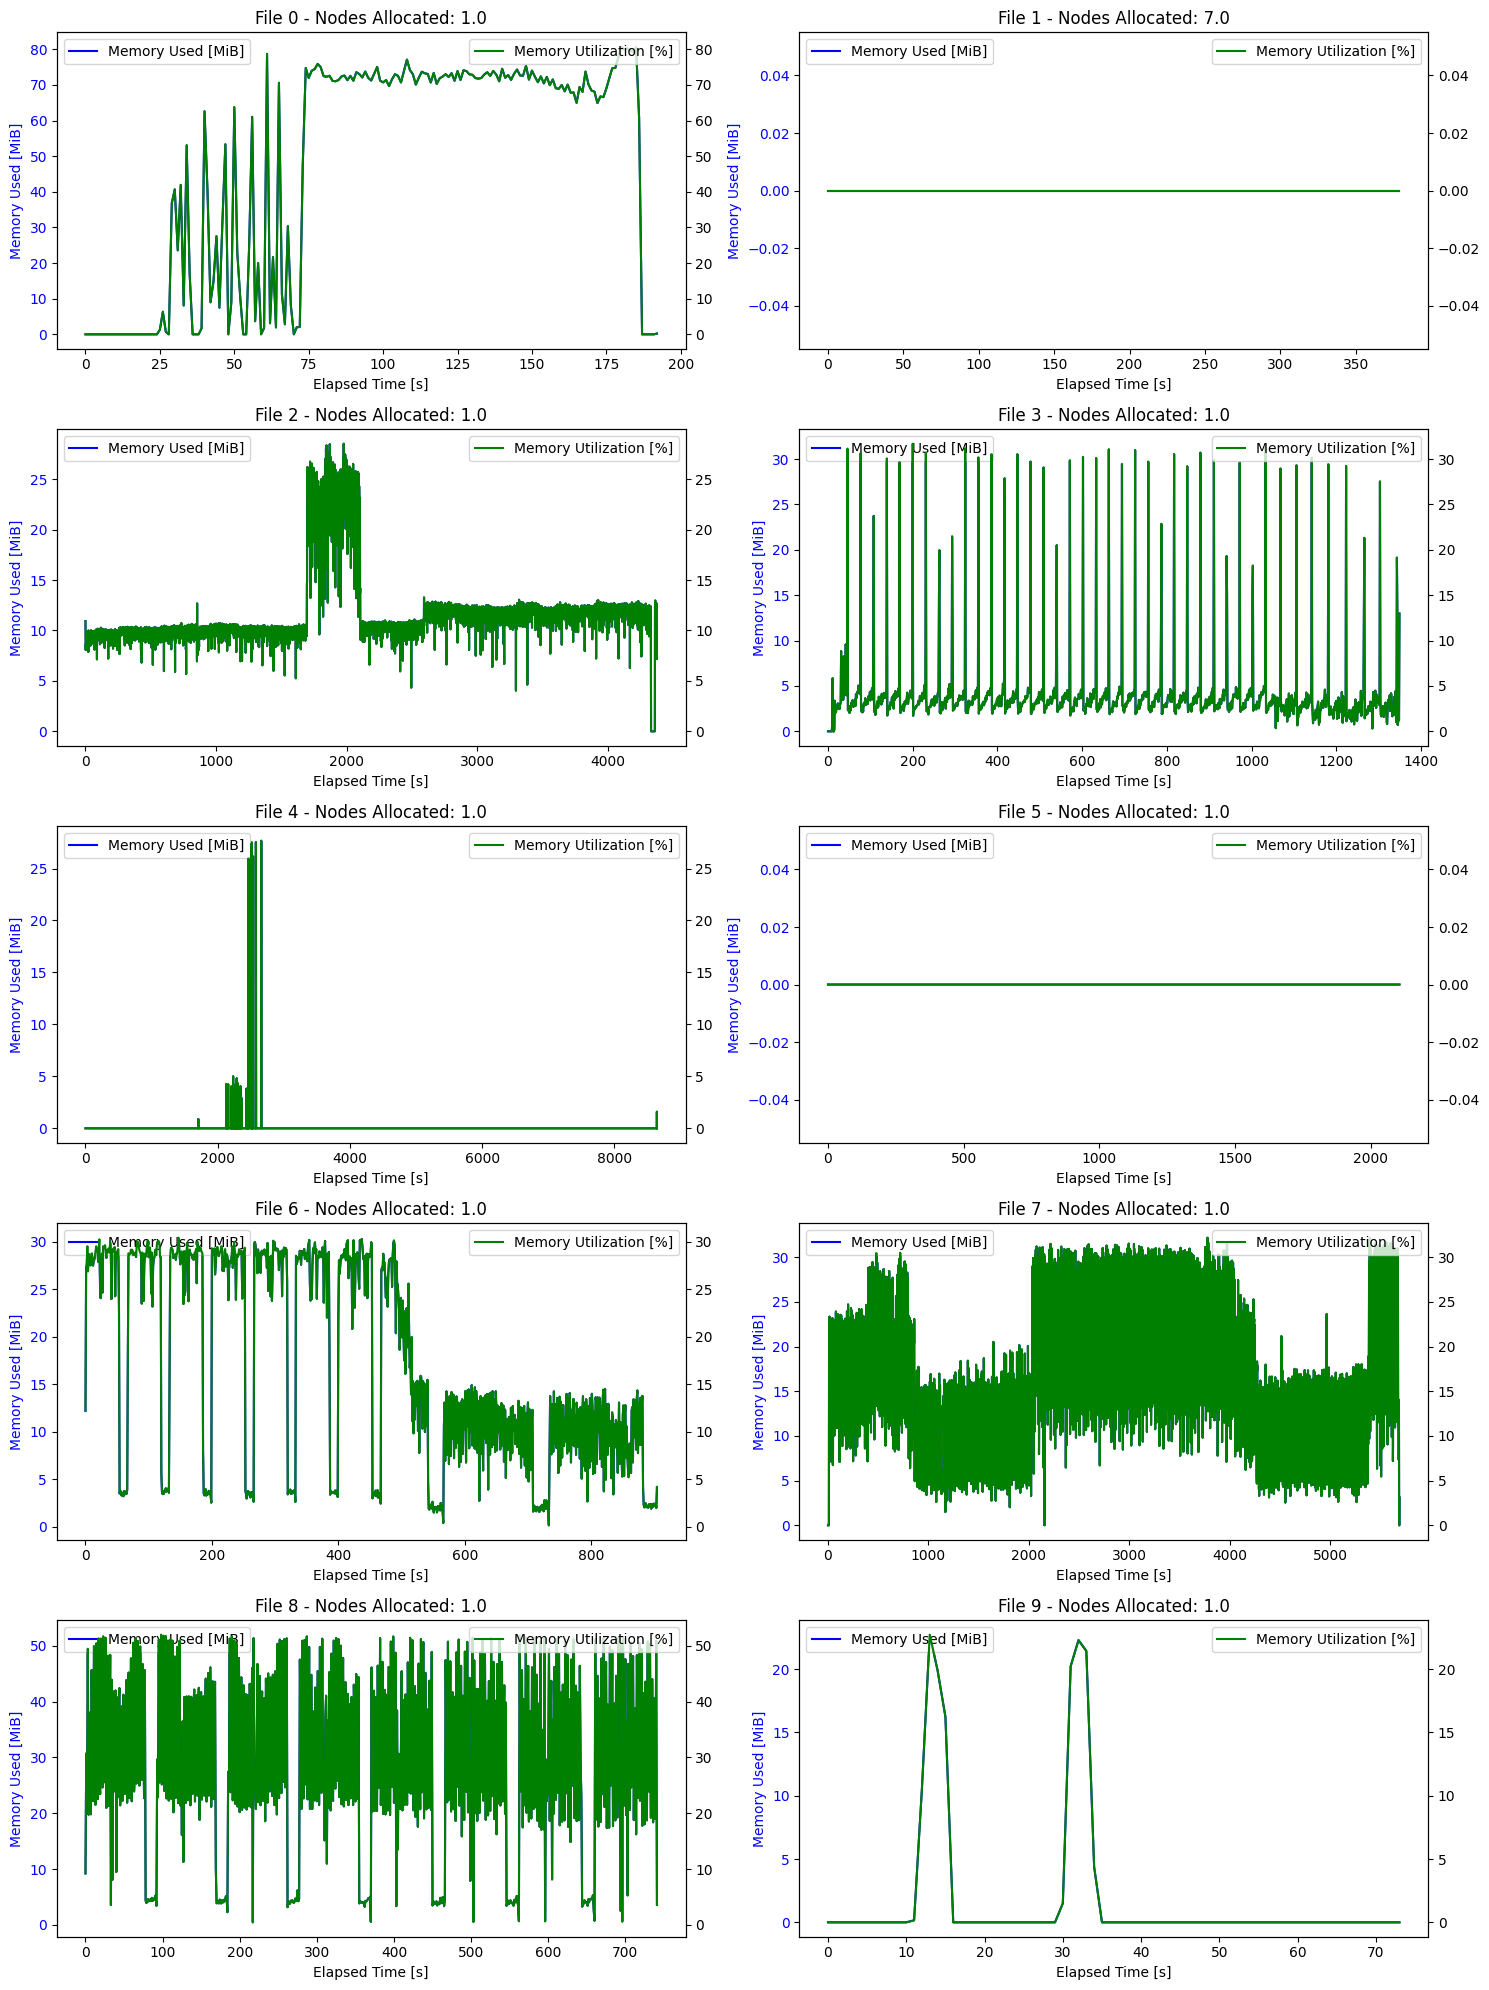

In [58]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
axes = axes.flatten()

for idx, (ax, df) in enumerate(zip(axes, plot_data)):
    # Plot memory used on the primary y-axis
    ax.plot(df['timestamp'], df['utilization_gpu_pct'], color='blue', label='Memory Used [MiB]')
    ax.set_ylabel('Memory Used [MiB]', color='blue')
    ax.tick_params(axis='y', labelcolor='blue')
    
    # Create a twin y-axis for utilization and nodes allocated
    ax2 = ax.twinx()
    
    # Plot utilization memory percentage
    ax2.plot(df['timestamp'], df['utilization_gpu_pct'], color='green', label='Memory Utilization [%]')
    
    # Add title and include nodes_alloc
    nodes_alloc = df['nodes_alloc'].max()  # You can use max, mean, or other stats
    ax.set_title(f'File {idx} - Nodes Allocated: {nodes_alloc}')
    ax.set_xlabel('Elapsed Time [s]')
    
    # Add legends for both y-axes
    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()
